In [1]:
from analysis.utils import *
from analysis.probabilities import *
from analysis.information import *
from datetime import datetime
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad, nquad
import numpy as np

In [2]:
apple = 'AAPL'
microsoft = 'MSFT'
google = 'GOOG'

tickers = [apple, microsoft, google]
# start_date = datetime(2015, 10, 15)
# end_date = datetimte(2023, 10, 15)
# download_tickers(tickers, start_date, end_date)

apple_df = pd.read_csv(f'data/{apple}.csv')
microsoft_df = pd.read_csv(f'data/{microsoft}.csv')
google_df = pd.read_csv(f'data/{google}.csv')

<Axes: >

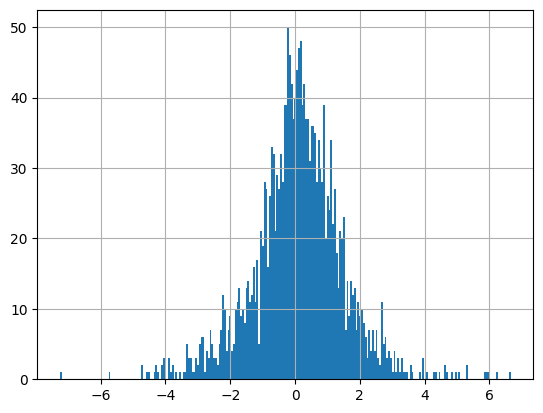

In [3]:
apple_df['Returns'].hist(bins=250)

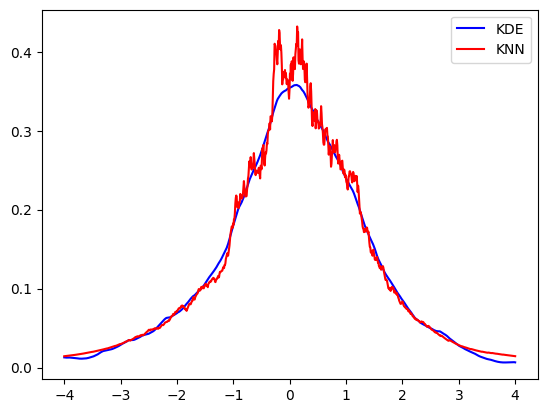

In [4]:
# test of density for one random variable
returns = np.array([apple_df['Returns']]).transpose()

# bandwidth = 'silverman' | 'scott' | float
kde = KDE(kernel='exponential', bandwidth='silverman')
knn = KNN(100)

pdf_kde = pdf(kde, returns)
pdf_knn = pdf(knn, returns)

# print density distributions
x_vals = np.linspace(-4, 4, 1000)
y_knn = [pdf_knn(x) for x in x_vals]
y_kde = [pdf_kde(x) for x in x_vals]


plt.plot(x_vals, y_kde, label='KDE', color='blue')
plt.plot(x_vals, y_knn, label='KNN', color='red')
plt.legend()
plt.show()

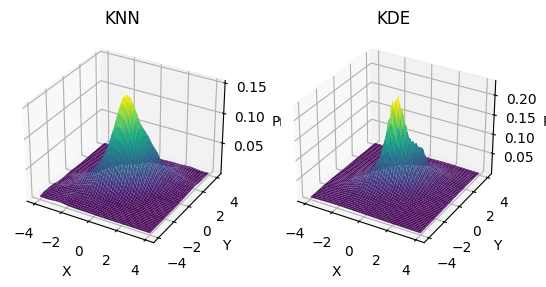

0.021776722525108032
0.023638627057082966


In [6]:
# test of density for multiple random variable
returns = np.array([apple_df['Returns'], google_df['Returns']]).transpose()

pdf_kde = pdf(kde, returns)
pdf_knn = pdf(knn, returns)

x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
z_knn = np.array([[pdf_kde(x, y) for x in x_vals] for y in y_vals])
z_kde = np.array([[pdf_knn(x, y) for x in x_vals] for y in y_vals])

x, y = np.meshgrid(x_vals, y_vals)
fig = plt.figure()

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z_knn, cmap='viridis')
ax1.set_title('KNN')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Pr')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z_kde, cmap='viridis')
ax2.set_title('KDE')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Pr')

plt.show()

print(pdf_kde(2, 2))
print(pdf_knn(2, 2))

0.24477075851600108
0.27946931492360017


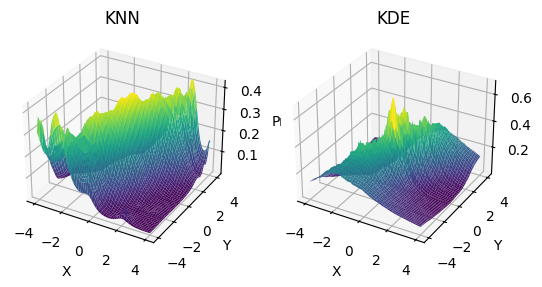

In [7]:
# test of conditional density
joint = np.array([apple_df['Returns']]).transpose()
cond = np.array([google_df['Returns']]).transpose()

pdf_kde = pdf(kde, joint, cond)
pdf_knn = pdf(knn, joint, cond)

x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
z_knn = np.array([[pdf_kde(x, y) for x in x_vals] for y in y_vals])
z_kde = np.array([[pdf_knn(x, y) for x in x_vals] for y in y_vals])

x, y = np.meshgrid(x_vals, y_vals)
fig = plt.figure()

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z_knn, cmap='viridis')
ax1.set_title('KNN')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Pr')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z_kde, cmap='viridis')
ax2.set_title('KDE')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Pr')

print(pdf_kde(2, 2))
print(pdf_knn(2, 2))

In [8]:
# test mutual information
source = np.array([apple_df['Returns']]).transpose()
target = np.array([microsoft_df['Returns']]).transpose()
cond = np.array([google_df['Returns']]).transpose()

print(mutual_information(source, target))
print(mutual_information(source, target, cond))

0.4574788272968704
0.14759444086679843
